In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport

# EDA

In [14]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')
print(f'The Test Dataset contains, Rows: {test_df.shape[0]} & Columns: {test_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12
The Test Dataset contains, Rows: 418 & Columns: 11


## 瀏覽資料

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 觀察欄位數值or類別型態
- 觀察缺失值

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 透過 pandas_profiling 輔助觀看更完整的資料統計
- 生成成`Titanic_Profile_Report.html`可直接點選來看

In [11]:
profile = ProfileReport(train_df, title='Titanic Profile Report', explorative=True)
profile.to_file('Titanic_Profile_Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]


## 製相關圖表
- 定義繪圖函數，視覺化觀察數據分布 
- 挑選可能可幫助分類的類別型特徵  

In [12]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
    # Create barplot 
    plt.figure(figsize=figsize)

    if hue:
        ax = sns.countplot(y=feature, data=dataframe, palette=color)
    else:
        ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

    # Annotate every single Bar with its value, based on it's width           
    for p in ax.patches:
        width = p.get_width()
        plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/train_df[feature].shape[0]),
              ha='center', va='center')

    plt.title(title, fontsize=23)
    return None
    
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for p in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = p.get_x()
        y = p.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)
    return None

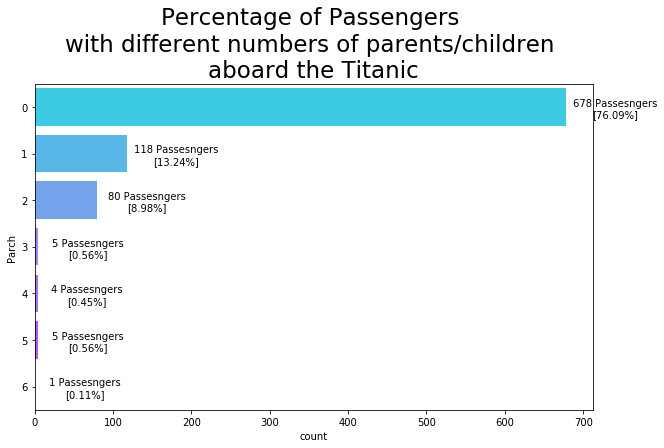

In [8]:
numeric_df = train_df[numeric_features]
horizontal_bar_plot('Parch', numeric_df, 'cool', 
                    "Percentage of Passengers \nwith different numbers of parents/children \naboard the Titanic",
                    (63, 0.55), (10, 6))

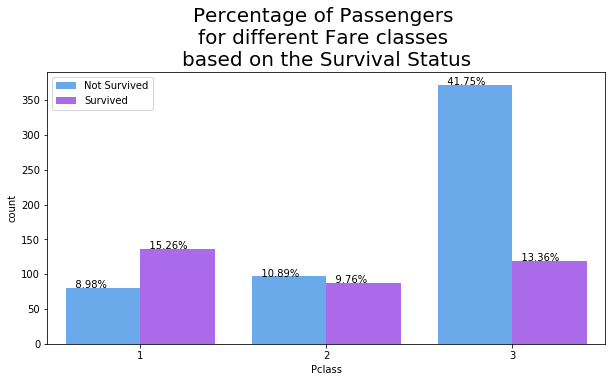

In [9]:
bar_plot('Pclass', numeric_df, 'cool', 
         "Percentage of Passengers \nfor different Fare classes \nbased on the Survival Status", 
         (10, 5), 3, 'Survived')

plt.legend(loc='upper left', labels=['Not Survived', 'Survived']);

- 船上男生女生生還死亡人數統計 & 生存比

,Sex,Survived
0,female,0.742
1,male,0.189


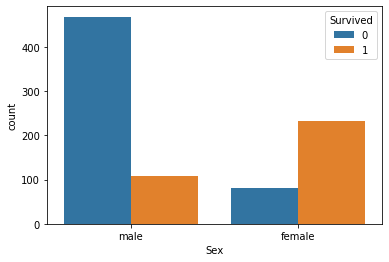

In [10]:
sns.countplot(train_df['Sex'], hue=train_df['Survived'])
display(train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().round(3))

# Start Build Process and the model  
1. 將乘客ID，姓名，票，船艙挑掉  
- 原因:  
    - `ID` :沒能給更多資訊純粹編碼計人數用  
    - `姓名` :沒有特別將稱呼抓出來分析，認為有性別欄位在，姓名資訊量較少(當然可以針對家族進行分群分析，但認為可能會太多類別)  
    - `票` :沒有下手的概念，有文字也有代碼參雜，選擇移除  
    - `船艙` :因為缺失值過多，故拔除，認為 `Pclass` 可以更有效提供訊息  

2. 將留存下來的類別欄位轉換成one-hot encoding  
3. 將剩餘數值型態缺失值用中位數填補  
4. 分類器選擇 : RandomForestClassifier  

In [36]:
class DataPrepocess:
    def __init__(self, df):
        self.df = df.copy()
    
    def drop_feature(self):
        self.df = self.df.drop(labels= ['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin'], axis=1)        
        pass

        return None


    def category_to_one_hot_encode(self):
        self.df = pd.get_dummies(self.df)

        return None


    def fill_null(self):    
        self.df = self.df.fillna(self.df.median())

        return None
    

    def feature_transform(self):
        self.drop_feature()
        self.category_to_one_hot_encode()
        self.fill_null()

        return None


    def get_data(self, is_train=True):
        self.feature_transform()
        X = self.df.drop(labels=['Survived'], axis=1)
        y = self.df['Survived']
        return (X,y) if is_train else X

# PassengerIdX	Survived	Pclass	NameX	Sex	Age	SibSpX	Parch	TicketX	FareX	Cabin	Embarked

### Training process
- apply tree based model (Random Forest)

In [52]:
def Training(X,y):    
    model = RandomForestClassifier(random_state=2,
                                n_estimators=100,
                                criterion='gini',
                                min_samples_split=20,
                                oob_score=True)
    model.fit(X,y)

    return model


def TestPrepocessing(df):
    ID = df['PassengerId']
    df = df.drop(labels= ['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin'], axis=1)
    df = pd.get_dummies(df)
    df = df.fillna(df.median())

    return ID, df


def predict(model, X):
    return model.predict(X)


def save_predict(Id, predict, filename='submission.csv'):
    df = pd.DataFrame({'PassengerId':Id, 'Survived':predict})
    df.to_csv(filename, index=False)
    print("Your submission was successfully saved!")
    return None


In [48]:
train_df = pd.read_csv('train.csv')
DP = DataPrepocess(train_df)
train_preprocess = DP.get_data(is_train=True)
X,y = train_preprocess
model = Training(X, y)
score = model.score(X,y)
print(f'The training score {score:.4f}')

The training score 0.8676


In [53]:
test_df = pd.read_csv('test.csv')
Id, test = TestPrepocessing(test_df)
Prediction = predict(model, test)
save_predict(Id=Id, predict=Prediction, filename='submission.csv')

Your submission was successfully saved!
